In [1]:
#importing dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import tabletext

In [2]:
#importing CSV files
video_game = pd.read_csv("Game sales files/Video_Games_Sales_as_at_22_Dec_2016.csv")
xbox1 = pd.read_csv("Game sales files/Xbox One Sales.csv")
ps4 = pd.read_csv("Game sales files/PS4 Sales.csv")
video_game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#cleaning data/Dropping columns with incomplete data sets
video_gameworatings = video_game[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
video_gameworatings.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#renameing columns for clean concat in PS4 dataframe
ps4['Platform'] = 'PS4'
ps4 = ps4.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
ps4 = ps4[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
ps4.head()



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS4,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,PS4,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,PS4,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,PS4,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
#renameing columns for clean concat in Xbox One dataframe
xbox1['Platform'] = 'Xbox One'
xbox1 = xbox1.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
xbox1 = xbox1[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
xbox1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,Xbox One,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,Call of Duty: Black Ops 3,Xbox One,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,Call of Duty: WWII,Xbox One,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,Red Dead Redemption 2,Xbox One,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,MineCraft,Xbox One,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [6]:
#joining dataframes together
dataframes = [video_gameworatings, ps4, xbox1]
mergeddata = pd.concat(dataframes)
mergeddata = mergeddata.loc[mergeddata['Year_of_Release']<=2016]
mergeddata = mergeddata.reset_index(drop=True)
mergeddata

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
17279,Alekhine's Gun,Xbox One,2016.0,Action,Maximum Games,0.00,0.00,0.00,0.00,0.00
17280,Super Dungeon Bros,Xbox One,2016.0,Action,Wired Productions,0.00,0.00,0.00,0.00,0.00
17281,Pro Cycling Manager 2016,Xbox One,2016.0,Sports,Focus Home Interactive,0.00,0.00,0.00,0.00,0.00
17282,We Sing (2016),Xbox One,2016.0,Music,THQ Nordic,0.00,0.00,0.00,0.00,0.00


In [7]:
#Grouping data by Publisher and creating a new DataFrame for that info
publisher_count = mergeddata.groupby('Publisher')['Year_of_Release'].count()
publisher_info = pd.DataFrame(publisher_count)
publisher_info = publisher_info.rename(columns={'Year_of_Release': '# of Games Released'})
publisher_info = publisher_info.reset_index()
publisher_total_NA = mergeddata.groupby('Publisher')['NA_Sales'].sum()
publisher_total_EU = mergeddata.groupby('Publisher')['EU_Sales'].sum()
publisher_total_JP = mergeddata.groupby('Publisher')['JP_Sales'].sum()
publisher_total_Other = mergeddata.groupby('Publisher')['Other_Sales'].sum()
publisher_total_Global = mergeddata.groupby('Publisher')['Global_Sales'].sum()
publisher_info = pd.merge(publisher_info, publisher_total_NA, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_EU, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_JP, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Other, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Global, on = "Publisher")
publisher_info.sort_values(by='Global_Sales', ascending = False).head(20)


,Publisher,# of Games Released,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
386,Nintendo,700,815.86,418.58,457.74,94.55,1786.72
150,Electronic Arts,1375,616.82,402.08,15.63,136.10,1170.91
25,Activision,1028,467.90,242.01,7.79,86.05,803.83
491,Sony Computer Entertainment,710,282.12,204.36,75.79,86.34,648.53
573,Ubisoft,1000,278.56,191.72,8.68,57.94,537.09
534,Take-Two Interactive,423,223.69,119.95,5.93,55.95,405.50
527,THQ,712,207.55,93.66,5.01,31.87,338.11
296,Konami Digital Entertainment,840,91.30,71.74,92.48,30.63,286.35
373,Namco Bandai Games,984,78.27,50.21,130.51,17.44,276.54
479,Sega,641,109.29,81.36,57.30,24.04,272.20


In [8]:
#creating Function for quick statistical analysis
def  stats(a, b):
    quartilesval = a.quantile([.25, .5, .75])
    lowerq = quartilesval[.25]
    upperq = quartilesval[.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (iqr*1.5)
    upperbound = upperq + (iqr*1.5)
    upperoutliers = b.loc[a >= upperbound]
    loweroutliers = b.loc[a <= lowerbound]
    outliers=pd.concat([upperoutliers, loweroutliers])
    print(f'The statistical analysis states that there are {len(outliers)} outliers')
    print(f'the upper bound is {upperbound} and the lower bound is {lowerbound}')
    
#creating Function for quick calling for linear regression and plotting line of best fit.
def linearregress(x,y,a,b):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
    plt.scatter(x,y, color='blue')
    plt.plot(x,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(a,b),fontsize=15, color='red')
    plt.grid()
    
    
   

The statistical analysis states that there are 91 outliers
the upper bound is 3.9287500000000017 and the lower bound is -2.261250000000001
The r-square is 0.8078174644284765
y=0.72x+-4.61


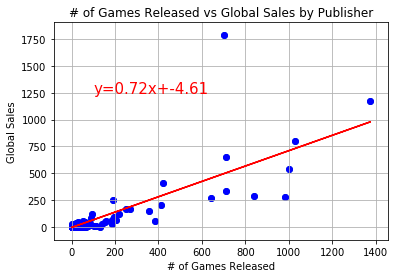

In [9]:
#creating plot of games released vs Global sales by Publisher
#set x var
x_release = publisher_info['# of Games Released']
#set y var
y_global_sales = publisher_info['Global_Sales']
#creat scatter
plt.scatter(x_release,y_global_sales)
#calling in stats function 
stats(publisher_info['Global_Sales'], publisher_info)
#plot formatting
plt.xlabel('# of Games Released')
plt.ylabel('Global Sales')
plt.title('# of Games Released vs Global Sales by Publisher')
#calling in linear regression function
linearregress(x_release, y_global_sales, 100, 1250)

The statistical analysis states that there are 32 outliers
the upper bound is 28.050000000000004 and the lower bound is -14.110000000000005
The r-square is 0.568900412659872
y=0.11x+2.28


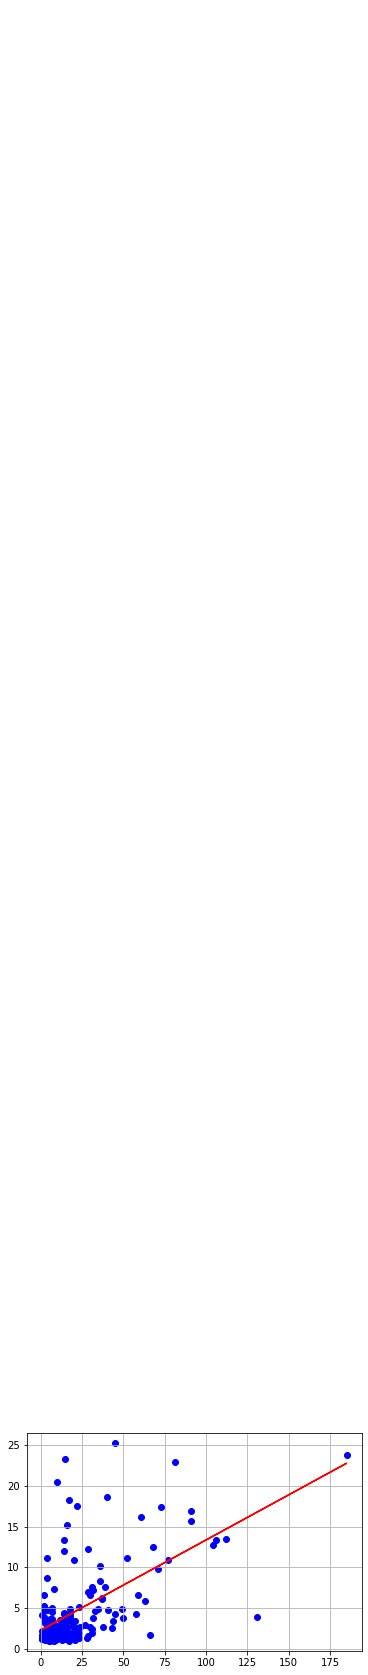

In [10]:
#checking if removing outliers would help the the data
stats_df = publisher_info.loc[publisher_info['Global_Sales'] > 1]
stats_df.sort_values(by='Global_Sales', ascending =True).head(20)
stats(stats_df['Global_Sales'], stats_df)
stats_df.describe()
test_df = stats_df.loc[stats_df['Global_Sales']<28.05]
test_df.describe()
linearregress(test_df['# of Games Released'],test_df['Global_Sales'], 100, 200)

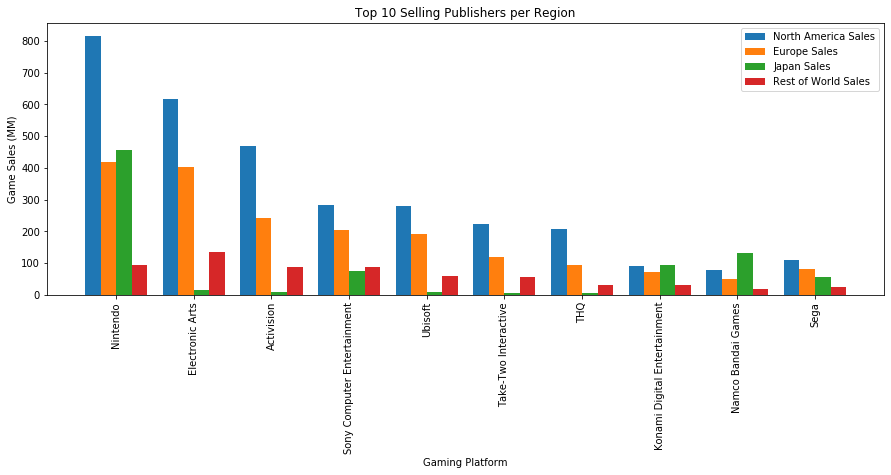

In [11]:
#collecting top 10 publishers by their Global Sales and placing them in new dataframe
sorted_pub_info = publisher_info.sort_values(by='Global_Sales', ascending=False).head(10)
#setting up for multi bar chart
x_positon = np.arange(len(sorted_pub_info))
objects = sorted_pub_info['Publisher']
Data = publisher_info[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
w=0.2
list_legend = ["North America Sales", "Europe Sales", "Japan Sales", "Rest of World Sales", "Global Sales(total sum)"]
#creating multi bar chart for top publishers
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,1,1)
NA=ax1.bar(x_positon-(w*2),sorted_pub_info['NA_Sales'],width = w)
EU=ax1.bar(x_positon-w,sorted_pub_info['EU_Sales'],width = w)
JP=ax1.bar(x_positon,sorted_pub_info['JP_Sales'],width = w)
OT=ax1.bar(x_positon+w,sorted_pub_info['Other_Sales'],width = w)
plt.xticks(x_positon-w/2,objects,rotation = 90)
#adding chart titles/labels/legend
ax1.legend([NA,EU,JP,OT],['North America Sales', 'Europe Sales', 'Japan Sales', 'Rest of World Sales'])
plt.xlabel('Gaming Platform')
plt.ylabel('Game Sales (MM)')
plt.title('Top 10 Selling Publishers per Region')
plt.show()

In [12]:
#sorting data by platform and creating new dataframe
byPlatform = mergeddata.groupby('Platform')['Global_Sales'].sum()
byPlatform_df=pd.DataFrame(byPlatform)
byPlatform_df = byPlatform_df.reset_index()
numbofgames = mergeddata.groupby('Platform')['Name'].count()
byPlatform_df = pd.merge(byPlatform_df, numbofgames, on = "Platform")
byPlatform_df = byPlatform_df.rename(columns = {'Name':'# of games released per platform'})
NAPlatform = mergeddata.groupby('Platform')['NA_Sales'].sum()
JPPlatform = mergeddata.groupby('Platform')['JP_Sales'].sum()
EUPlatform = mergeddata.groupby('Platform')['EU_Sales'].sum()
OtherPlatform = mergeddata.groupby('Platform')['Other_Sales'].sum()
byPlatform_df = pd.merge(byPlatform_df, NAPlatform, on = "Platform")
byPlatform_df = pd.merge(byPlatform_df, EUPlatform, on = "Platform")
byPlatform_df = pd.merge(byPlatform_df, JPPlatform, on = "Platform")
byPlatform_df = pd.merge(byPlatform_df, OtherPlatform, on = "Platform")
byPlatform_df = byPlatform_df[["Platform","# of games released per platform","Global_Sales","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
byPlatform_df.sort_values(by='Global_Sales', ascending = False).head()


,Platform,# of games released per platform,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16,PS2,2127,1233.46,572.92,332.63,137.54,190.47
28,X360,1232,961.39,595.74,268.32,12.30,84.88
17,PS3,1306,931.15,390.13,327.21,79.41,134.59
26,Wii,1286,891.74,486.87,258.32,68.28,77.71
4,DS,2121,803.44,380.31,188.41,175.02,59.04


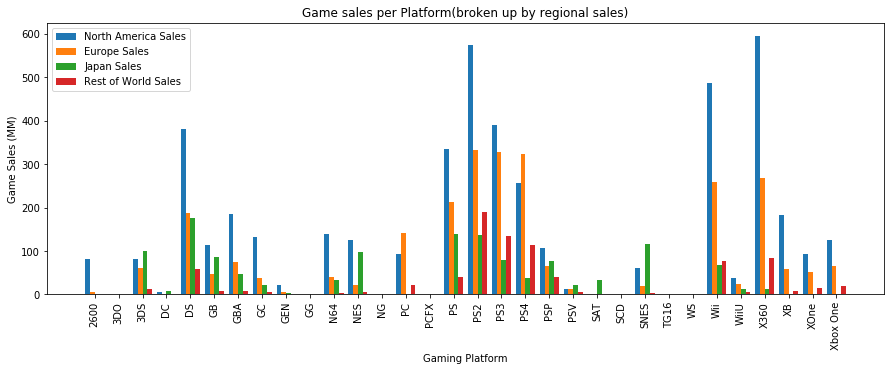

In [13]:
#setting parameters for multi bar chart
x_positon = np.arange(len(byPlatform_df['Platform']))
objects = byPlatform_df['Platform']
Data = byPlatform_df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
w=0.2
list_legend = ["North America Sales", "Europe Sales", "Japan Sales", "Rest of World Sales", "Global Sales(total sum)"]
#creating multi bar chart
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,1,1)
NA=ax1.bar(x_positon-(w*2),byPlatform_df['NA_Sales'],width = w)
EU=ax1.bar(x_positon-w,byPlatform_df['EU_Sales'],width = w)
JP=ax1.bar(x_positon,byPlatform_df['JP_Sales'],width = w)
OT=ax1.bar(x_positon+w,byPlatform_df['Other_Sales'],width = w)
# GL=ax1.bar(x_positon+(w*2),byPlatform_df['Global_Sales'],width = w)
plt.xticks(x_positon-w/2,objects,rotation = 90)
#adding labels/legend/title
ax1.legend([NA,EU,JP,OT],['North America Sales', 'Europe Sales', 'Japan Sales', 'Rest of World Sales'])
plt.xlabel('Gaming Platform')
plt.ylabel('Game Sales (MM)')
plt.title('Game sales per Platform(broken up by regional sales)')
plt.show()



In [14]:
#sorting platforms by which region had the highest sales for those consols
#Japan region best selling consol
JP_best_selling_consols = byPlatform_df.loc[byPlatform_df['JP_Sales']>byPlatform_df['NA_Sales']]
JP_best_selling_consols = JP_best_selling_consols.loc[JP_best_selling_consols['JP_Sales']>JP_best_selling_consols['EU_Sales']]
JP_best_selling_consols = JP_best_selling_consols.loc[JP_best_selling_consols['JP_Sales']>JP_best_selling_consols['Other_Sales']]
JP_best_selling_consols=JP_best_selling_consols.sort_values(by='JP_Sales', ascending = False)
#North America best selling consols
NA_best_selling_consols = byPlatform_df.loc[byPlatform_df['NA_Sales']>byPlatform_df['JP_Sales']]
NA_best_selling_consols = NA_best_selling_consols.loc[NA_best_selling_consols['NA_Sales']>NA_best_selling_consols['EU_Sales']]
NA_best_selling_consols = NA_best_selling_consols.loc[NA_best_selling_consols['NA_Sales']>NA_best_selling_consols['Other_Sales']]
NA_best_selling_consols=NA_best_selling_consols.sort_values(by='NA_Sales', ascending = False)
#Europe best selling consols
EU_best_selling_consols = byPlatform_df.loc[byPlatform_df['EU_Sales']>byPlatform_df['NA_Sales']]
EU_best_selling_consols = EU_best_selling_consols.loc[EU_best_selling_consols['EU_Sales']>EU_best_selling_consols['JP_Sales']]
EU_best_selling_consols = EU_best_selling_consols.loc[EU_best_selling_consols['EU_Sales']>EU_best_selling_consols['Other_Sales']]
EU_best_selling_consols=EU_best_selling_consols.sort_values(by='EU_Sales', ascending = False)
#rest of world best selling consols
Other_best_selling_consols = byPlatform_df.loc[byPlatform_df['Other_Sales']>byPlatform_df['NA_Sales']]
Other_best_selling_consols = Other_best_selling_consols.loc[Other_best_selling_consols['Other_Sales']>Other_best_selling_consols['EU_Sales']]
Other_best_selling_consols = Other_best_selling_consols.loc[Other_best_selling_consols['Other_Sales']>Other_best_selling_consols['JP_Sales']]
Other_best_selling_consols=Other_best_selling_consols.sort_values(by='Other_Sales', ascending = False)
#print statements showing the above results
print("-"*50)
print('The consols that have more sales in Japan than the rest of the world')
print(JP_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)
print('The consols that have more sales in North America than the rest of the world')
print(NA_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)
print('The consols that have more sales in Europe than the rest of the world')
print(EU_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)
print('The consols that have more sales in "Other" than the rest of the world')
print(Other_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)

--------------------------------------------------
The consols that have more sales in Japan than the rest of the world
0     SNES
1      3DS
2      SAT
3      PSV
4       DC
5       NG
6       WS
7     TG16
8      3DO
9       GG
10    PCFX
Name: Platform, dtype: object
--------------------------------------------------
The consols that have more sales in North America than the rest of the world
0         X360
1          PS2
2          Wii
3          PS3
4           DS
5           PS
6          GBA
7           XB
8          N64
9           GC
10         NES
11    Xbox One
12          GB
13         PSP
14        XOne
15        2600
16        WiiU
17         GEN
18         SCD
Name: Platform, dtype: object
--------------------------------------------------
The consols that have more sales in Europe than the rest of the world
0    PS4
1     PC
Name: Platform, dtype: object
--------------------------------------------------
The consols that have more sales in "Other" than the rest of the w

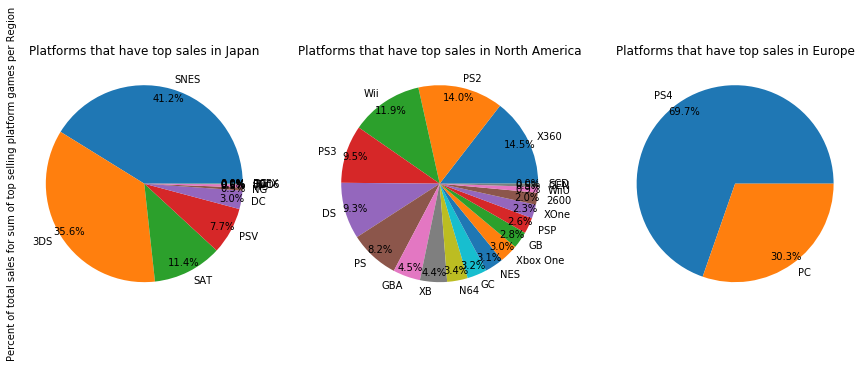

In [15]:
#setting up the label groups for the 3 regions that had platforms that had the best game sales
labelJP = JP_best_selling_consols['Platform']
labelNA = NA_best_selling_consols['Platform']
labelEU = EU_best_selling_consols['Platform']
#setting up the y var for the 3 regions that had platforms that had the best game sales
yJP = JP_best_selling_consols['JP_Sales']
yNA = NA_best_selling_consols['NA_Sales']
yEU = EU_best_selling_consols['EU_Sales']

#creating multi pie plot
fig, axs=plt.subplots(1,3, figsize=(15,15))
axs[0].pie(yJP, labels = labelJP,autopct='%1.1f%%',pctdistance=0.9)
axs[0].set_title("Platforms that have top sales in Japan")
# plt.title()
axs[1].pie(yNA, labels = labelNA,autopct='%1.1f%%',pctdistance=0.9)
axs[1].set_title("Platforms that have top sales in North America")

axs[2].pie(yEU,labels=labelEU,autopct='%1.1f%%',pctdistance=.9)
axs[2].set_title("Platforms that have top sales in Europe")
axs[0].set_ylabel('Percent of total sales for sum of top selling platform games per Region')
plt.show()

In [16]:
# Sort data for most popular genre based on global sales
genre_count = mergeddata.groupby('Genre')['Global_Sales'].count()
genre_info = pd.DataFrame(genre_count)
genre_info = genre_info.rename(columns = {"Global_Sales" : "# of Games per Genre"})
genre_info = genre_info.reset_index()
genre_total_NA = mergeddata.groupby('Genre')['NA_Sales'].sum()
genre_total_EU = mergeddata.groupby('Genre')['EU_Sales'].sum()
genre_total_JP = mergeddata.groupby('Genre')['JP_Sales'].sum()
genre_total_Other = mergeddata.groupby('Genre')['Other_Sales'].sum()
genre_total_Global = mergeddata.groupby('Genre')['Global_Sales'].sum()
genre_info = pd.merge(genre_info, genre_total_NA, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_EU, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_JP, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_Other, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_Global, on = "Genre")
genre_info.head()

,Genre,# of Games per Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,3513,916.57,562.02,165.39,199.37,1844.53
1,Action-Adventure,49,18.29,21.13,1.19,6.76,47.31
2,Adventure,1350,106.81,69.17,53.61,18.22,247.93
3,Fighting,868,228.61,103.79,88.38,38.17,458.93
4,MMO,5,1.95,1.69,0.14,0.60,4.39


<function matplotlib.pyplot.show(*args, **kw)>

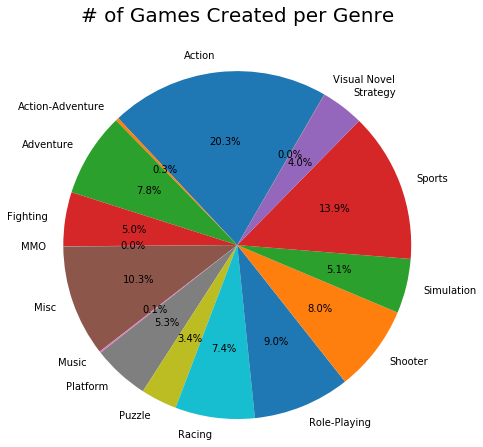

In [17]:
# genre_vs_region = genre_info.loc[genre_info["Global_Sales_x"].idxmax()]
# genre_vs_region

# Graph for amount of games created per genre

y=genre_info['# of Games per Genre']
labels = genre_info['Genre']
plt.pie(y, labels=labels, autopct='%1.1f%%', radius = 2, startangle = 60)
plt.title("# of Games Created per Genre", y=1.5, fontsize = 20)
plt.show

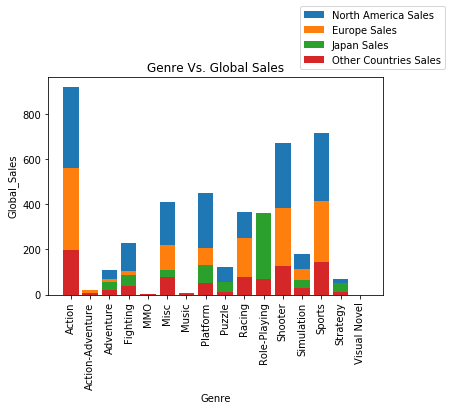

In [18]:
# Stacked Bar Graph for Genre Vs. Sales 
ind = np.arange(len(labels))
NA_Sales = genre_info["NA_Sales"]
EU_Sales = genre_info["EU_Sales"]
JP_Sales = genre_info["JP_Sales"]
Other_Sales = genre_info["Other_Sales"]
p1 = plt.bar(ind, NA_Sales)
p2 = plt.bar(ind, EU_Sales)
p3 = plt.bar(ind, JP_Sales)
p4 = plt.bar(ind, Other_Sales)

plt.ylabel("Global_Sales")
plt.xlabel("Genre")
plt.title("Genre Vs. Global Sales")
plt.xticks(ind, labels, rotation = 90)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('North America Sales', 'Europe Sales', 'Japan Sales', 'Other Countries Sales'), bbox_to_anchor=(1.2,1.18), loc = 'right')
plt.show()

In [19]:
na_sales_title = mergeddata[mergeddata["NA_Sales"] == mergeddata['NA_Sales'].max()]["Name"][0]
eu_sales_title = mergeddata[mergeddata["EU_Sales"] == mergeddata['EU_Sales'].max()]["Name"][0]
jp_sales_title = mergeddata[mergeddata["JP_Sales"] == mergeddata['JP_Sales'].max()]["Name"][4]
other_sales_title = mergeddata[mergeddata["Other_Sales"] == mergeddata['Other_Sales'].max()]["Name"][17]


# New data Frame fro best seller
best_seller_data = pd.DataFrame({'North America Best Seller': [na_sales_title],
                                 'Europe Best Seller': [eu_sales_title],
                                 'Japan Best Seller': [jp_sales_title],
                                 'Rest of the World Best Seller': [other_sales_title]})
best_seller_data




,North America Best Seller,Europe Best Seller,Japan Best Seller,Rest of the World Best Seller
0,Wii Sports,Wii Sports,Pokemon Red/Pokemon Blue,Grand Theft Auto: San Andreas


In [20]:
#global sale of each genre
genre_counts = mergeddata["Genre"].value_counts()
genre_counts

Action              3513
Sports              2406
Misc                1787
Role-Playing        1558
Shooter             1387
Adventure           1350
Racing              1276
Platform             908
Simulation           876
Fighting             868
Strategy             688
Puzzle               581
Action-Adventure      49
Music                 24
Visual Novel           6
MMO                    5
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Total genre Count')

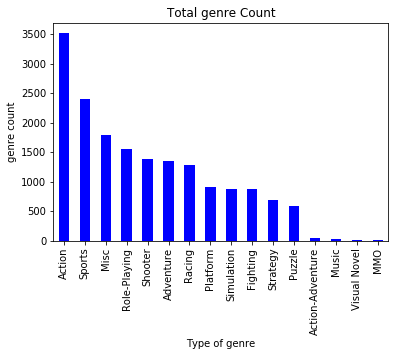

In [21]:
#making bar chart for genre vs game count
x_axis = genre_counts.index
y_axis = genre_counts.values
genre_counts.plot(kind = "bar", facecolor='blue')
plt.ylabel("genre count")
plt.xlabel("Type of genre")
plt.title("Total genre Count")



In [22]:
#setting x/y var for each of the genre for a line chart 
sale = mergeddata.loc[mergeddata['Genre'] == 'Action']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x1 = sale_data.index
y1 = sale_data.values


#global sale of sports genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Sports']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x2 = sale_data.index
y2 = sale_data.values


#global sale of misc genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Misc']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x3 = sale_data.index
y3 = sale_data.values


#global sale of Role-playing genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Role-Playing']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x4 = sale_data.index
y4 = sale_data.values


#global sale of shooter genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Shooter']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x5 = sale_data.index
y5 = sale_data.values


#global sale of adventure genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Adventure']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x6 = sale_data.index
y6 = sale_data.values


#global sale of racing genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Racing']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x7 = sale_data.index
y7 = sale_data.values


#global sale of sports genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Platform']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x8 = sale_data.index
y8 = sale_data.values


#global sale of Simulation genre over time
sale = mergeddata.loc[mergeddata['Genre'] == 'Simulation']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']

x9 = sale_data.index
y9 = sale_data.values

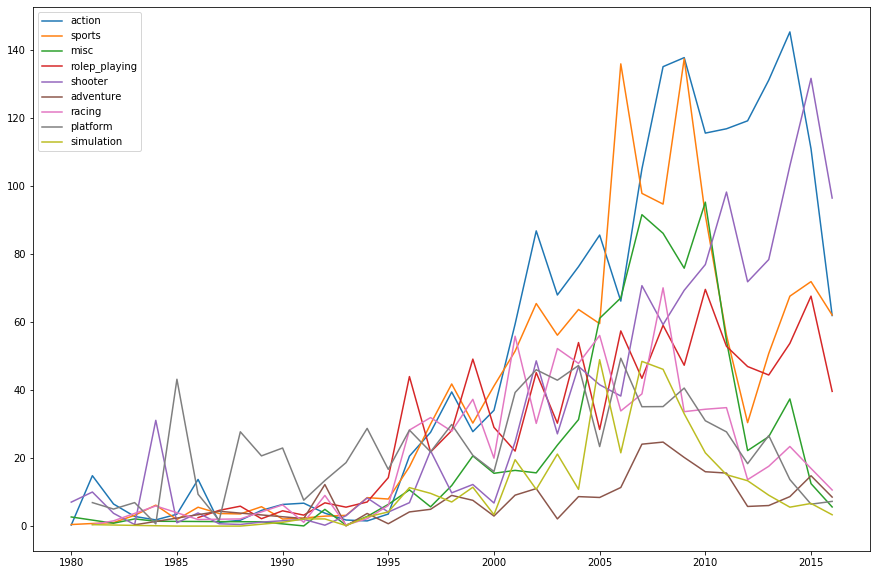

In [23]:
#creating line chart of genre sales vs year
plt.figure(figsize=(15,10))
action,= plt.plot(x1,y1,label="action")
sports,=plt.plot(x2,y2,label="sports")
misc,=plt.plot(x3,y3,label="misc")
role_playing,=plt.plot(x4,y4,label="rolep_playing")
shooter,=plt.plot(x5,y5,label="shooter")
adventure,=plt.plot(x6,y6,label="adventure")
racing,=plt.plot(x7,y7,label="racing")
platform,=plt.plot(x8,y8,label="platform")
simulation,=plt.plot(x9,y9,label="simulation")

plt.legend(handles=[action,sports,misc,role_playing,shooter,adventure,racing,platform,simulation], loc="best")


plt.show()

In [24]:
#looking into the years for sports genre due to the spikes in sales in the two years and then the drastic falloff
sale = mergeddata.loc[mergeddata['Genre'] == 'Sports']
sale_data=sale.groupby(['Year_of_Release']).sum()['Global_Sales']
sale_data

Year_of_Release
1980.0      0.49
1981.0      0.79
1982.0      1.05
1983.0      3.20
1984.0      6.18
1985.0      1.96
1986.0      5.57
1987.0      3.72
1988.0      3.60
1989.0      5.72
1990.0      2.11
1991.0      2.41
1992.0      2.95
1993.0      3.18
1994.0      8.39
1995.0      7.98
1996.0     17.45
1997.0     30.02
1998.0     41.79
1999.0     30.29
2000.0     41.19
2001.0     51.43
2002.0     65.42
2003.0     56.11
2004.0     63.67
2005.0     59.51
2006.0    135.83
2007.0     97.78
2008.0     94.63
2009.0    137.33
2010.0     91.34
2011.0     56.12
2012.0     30.42
2013.0     50.75
2014.0     67.58
2015.0     71.86
2016.0     62.04
Name: Global_Sales, dtype: float64